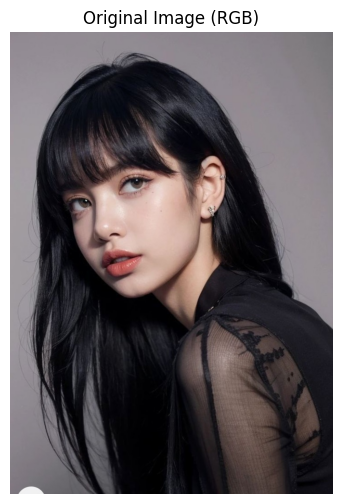

In [1]:
# Importing Required Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the Image
image_path = '.././images/lisa.jpg'  # Update this path if needed


image = cv2.imread(image_path)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert the image to HSV

# Display the Original Image in HSV
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # For visualization in RGB
plt.figure(figsize=(6, 6))
plt.imshow(image_rgb)
plt.title("Original Image (RGB)")
plt.axis("off")
plt.show()

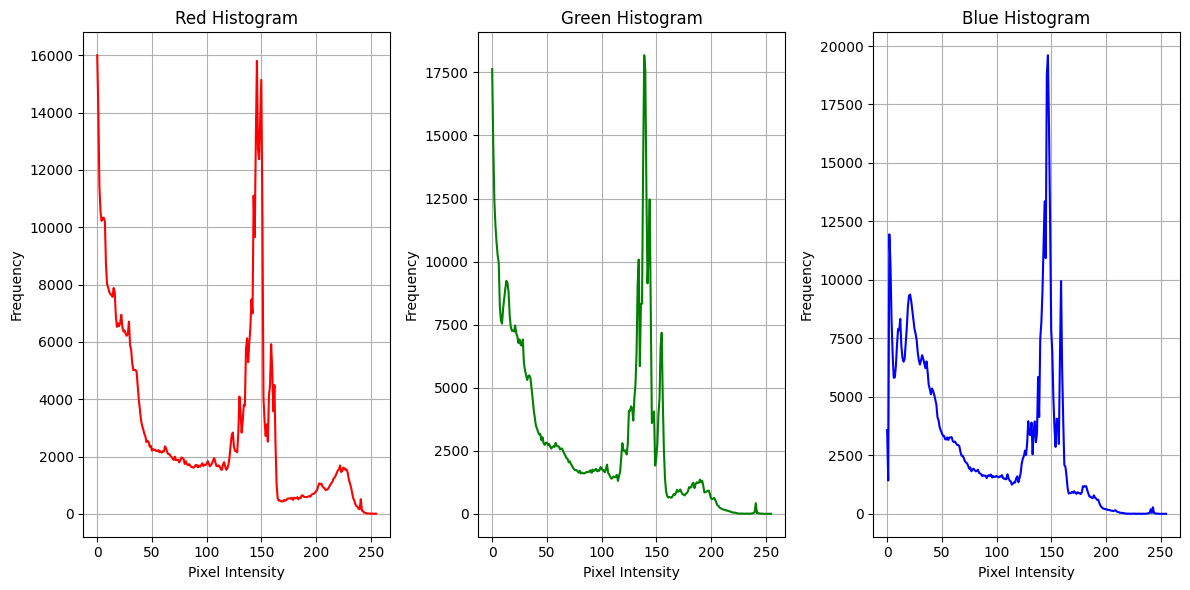

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Split the RGB Channels
r, g, b = cv2.split(image_rgb)

# Plot Histograms for Each Channel
channels = {'Red': r, 'Green': g, 'Blue': b}
colors = {'Red': 'red', 'Green': 'green', 'Blue': 'blue'}
plt.figure(figsize=(12, 6))

for i, (channel_name, channel_data) in enumerate(channels.items(), 1):
    plt.subplot(1, 3, i)
    histogram = cv2.calcHist([channel_data], [0], None, [256], [0, 256])
    plt.plot(histogram, color=colors[channel_name])
    plt.title(f"{channel_name} Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()


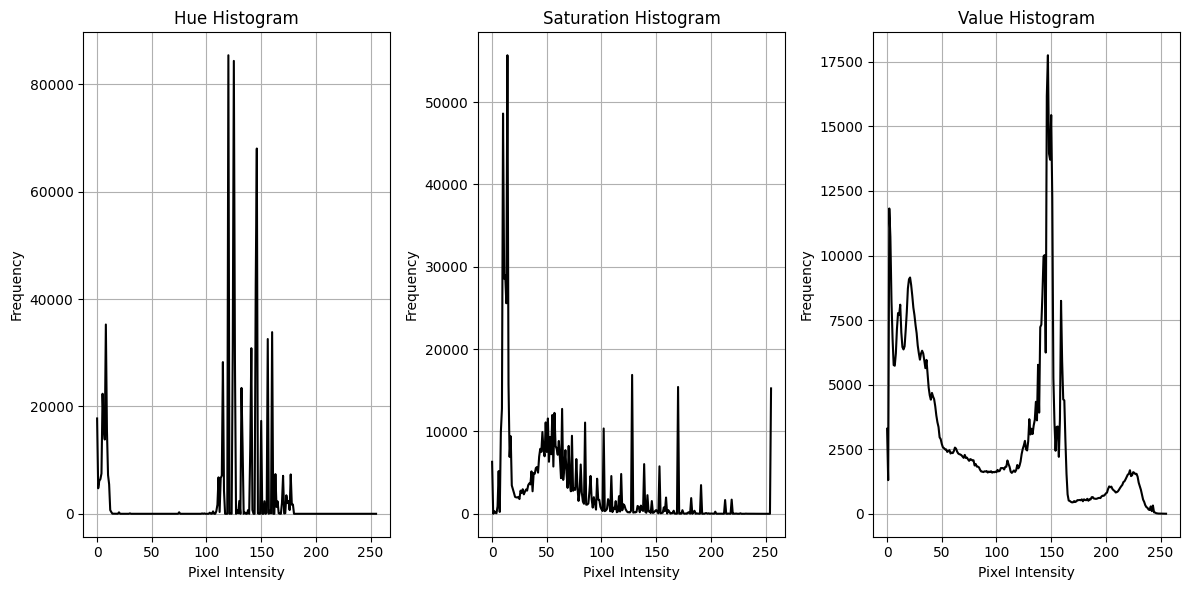

In [3]:

# Split the HSV Channels
h, s, v = cv2.split(image_hsv)

# Plot Histograms for Each Channel
channels = {'Hue': h, 'Saturation': s, 'Value': v}
plt.figure(figsize=(12, 6))

for i, (channel_name, channel_data) in enumerate(channels.items(), 1):
    plt.subplot(1, 3, i)
    histogram = cv2.calcHist([channel_data], [0], None, [256], [0, 256])
    plt.plot(histogram, color='black')
    plt.title(f"{channel_name} Histogram")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid()

plt.tight_layout()
plt.show()

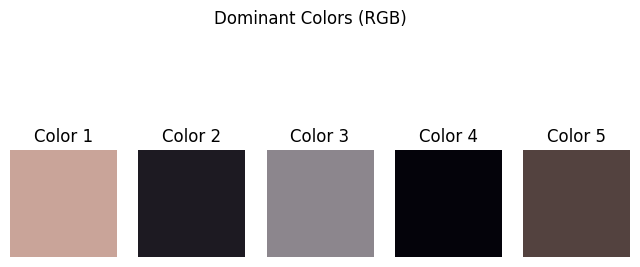

In [4]:
# Define the Number of Clusters (Colors)
num_colors = 5
pixels_hsv = image_hsv.reshape(-1, 3)
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=num_colors, random_state=42)
kmeans.fit(pixels_hsv)

# Extract the Cluster Centers (Dominant Colors) in HSV
dominant_colors_hsv = kmeans.cluster_centers_.astype(int)

# Convert Dominant Colors Back to RGB for Visualization
dominant_colors_rgb = cv2.cvtColor(np.uint8([dominant_colors_hsv]), cv2.COLOR_HSV2RGB)[0]

# Assign Labels to Each Pixel
labels = kmeans.labels_

# Reshape the Labels Back to the Shape of the Original Image
labels_reshaped = labels.reshape(image_hsv.shape[:2])

# Display the Dominant Colors
plt.figure(figsize=(8, 4))
for i, color in enumerate(dominant_colors_rgb):
    plt.subplot(1, num_colors, i + 1)
    plt.imshow([[color / 255]])
    plt.title(f"Color {i + 1}")
    plt.axis("off")
plt.suptitle("Dominant Colors (RGB)")
plt.show()

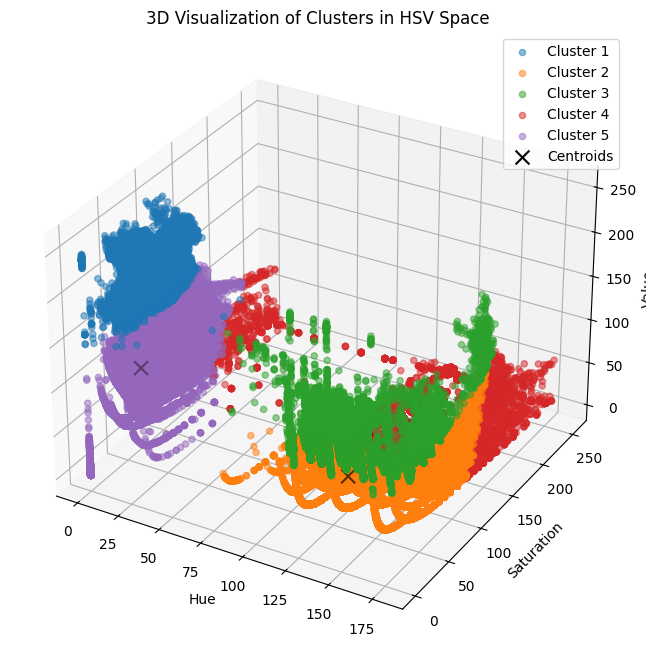

In [5]:
from mpl_toolkits.mplot3d import Axes3D



# Extract the HSV pixel values and their corresponding cluster labels
hsv_values = image_hsv.reshape(-1, 3)
cluster_labels = labels

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster with a different color
for cluster_idx in range(num_colors):
    cluster_points = hsv_values[cluster_labels == cluster_idx]
    ax.scatter(cluster_points[:, 0],  # Hue
               cluster_points[:, 1],  # Saturation
               cluster_points[:, 2],  # Value
               label=f"Cluster {cluster_idx + 1}",
               alpha=0.5)  # Adjust transparency for better visibility

# Highlight the cluster centers (dominant colors)
dominant_colors_hsv = kmeans.cluster_centers_
ax.scatter(dominant_colors_hsv[:, 0],  # Hue
           dominant_colors_hsv[:, 1],  # Saturation
           dominant_colors_hsv[:, 2],  # Value
           color='black',
           label="Centroids",
           s=100,  # Size of the markers
           marker='x')  # Centroid marker

# Label the axes
ax.set_xlabel("Hue")
ax.set_ylabel("Saturation")
ax.set_zlabel("Value")

# Add a legend
ax.legend()

# Add a title
ax.set_title("3D Visualization of Clusters in HSV Space")

# Show the plot
plt.show()



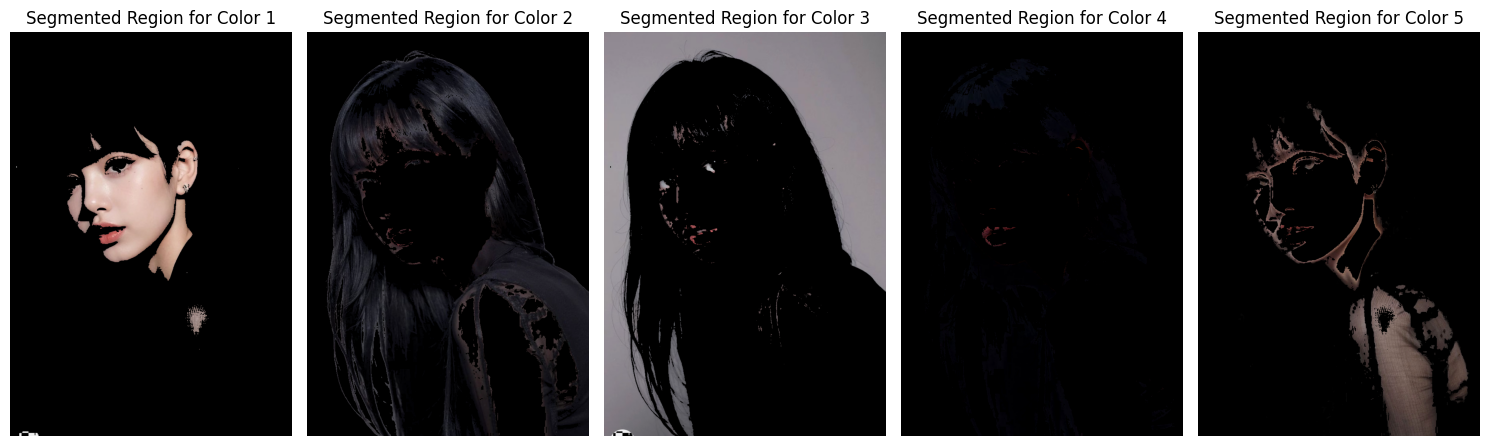

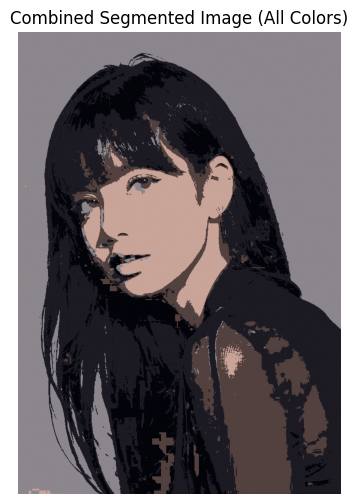

In [6]:
# Create and Display Segmented Images for Each Dominant Color
# Extract the HSV pixel values and their corresponding cluster labels
hsv_values = image_hsv.reshape(-1, 3)
cluster_labels = labels


plt.figure(figsize=(15, 5))

for i in range(num_colors):
    # Create a Mask for the Current Cluster
    mask = (labels_reshaped == i).astype(np.uint8)

    # Apply the Mask to the Original HSV Image
    segmented_hsv = cv2.bitwise_and(image_hsv, image_hsv, mask=mask)

    # Convert the Segmented Image Back to RGB for Display
    segmented_rgb = cv2.cvtColor(segmented_hsv, cv2.COLOR_HSV2RGB)

    # Display the Segmented Region
    plt.subplot(1, num_colors, i + 1)
    plt.imshow(segmented_rgb)
    plt.title(f"Segmented Region for Color {i + 1}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# **Part 3: Combined Segmentation Visualization**

# Overlay All Segmented Regions in One Image
segmented_image_hsv = dominant_colors_hsv[labels].reshape(image_hsv.shape)
segmented_image_rgb = cv2.cvtColor(segmented_image_hsv.astype(np.uint8), cv2.COLOR_HSV2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(segmented_image_rgb / 255)
plt.title("Combined Segmented Image (All Colors)")
plt.axis("off")
plt.show()

# **Student Exercise**
# 1. Modify the number of clusters and observe how the segmentation changes.
# 2. Compare the segmentation results in the HSV and RGB domains.
# 3. Crop a region of the image and analyze its segmentation independently.

# GaussianMixture

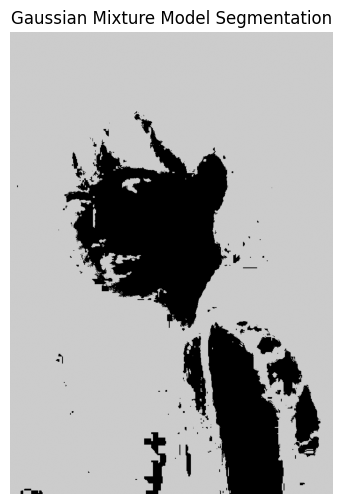

In [8]:
from sklearn.mixture import GaussianMixture
import cv2
import matplotlib.pyplot as plt

image_path ='.././images/lisa.jpg'  # Update this path if needed
image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2HSV) 
# Reshape the image
pixels_rgb = image_rgb.reshape(-1, 3)
pixels_hsv = image_hsv.reshape(-1, 3)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=42)
gmm_labels = gmm.fit_predict(pixels_hsv )

# Reshape to the image's original dimensions
gmm_segmentation = gmm_labels.reshape(image_rgb.shape[:2])

# Display Gaussian Mixture Model Segmentation
plt.figure(figsize=(6, 6))
plt.imshow(gmm_segmentation, cmap='nipy_spectral')
plt.title("Gaussian Mixture Model Segmentation")
plt.axis("off")
plt.show()


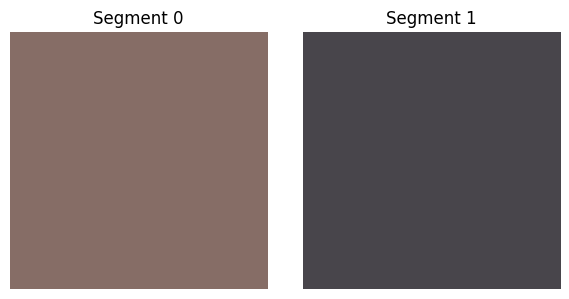

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture


image_path ='.././images/lisa.jpg'  # Update this path if needed
image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2HSV) 
# Reshape the image
pixels_rgb = image_rgb.reshape(-1, 3)
pixels_hsv = image_hsv.reshape(-1, 3)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='tied', random_state=42)
gmm_labels = gmm.fit_predict(pixels_hsv)

# Reshape to the image's original dimensions
gmm_segmentation = gmm_labels.reshape(image_rgb.shape[:2])

# Extract unique segment labels
unique_labels = np.unique(gmm_segmentation)

# Create a 1×n subplot
n_segments = len(unique_labels)
fig, axes = plt.subplots(1, n_segments, figsize=(n_segments * 3, 3))

# Display each dominant color in a subplot
for i, label in enumerate(unique_labels):
    # Create a mask for the current segment
    segment_mask = (gmm_segmentation == label)

    # Calculate the dominant color (mean color) for the segment
    segment_pixels = pixels_rgb[gmm_labels == label]  # Extract pixels in the segment
    dominant_color = segment_pixels.mean(axis=0)  # Compute mean color

    # Create an image with the dominant color
    color_image = np.ones((100, 100, 3), dtype=np.uint8) * dominant_color.astype(np.uint8)

    # Display the dominant color in the subplot
    ax = axes[i] if n_segments > 1 else axes  # Handle single subplot case
    ax.imshow(color_image)
    ax.set_title(f"Segment {label}")
    ax.axis("off")

# Adjust spacing
plt.tight_layout()
plt.show()



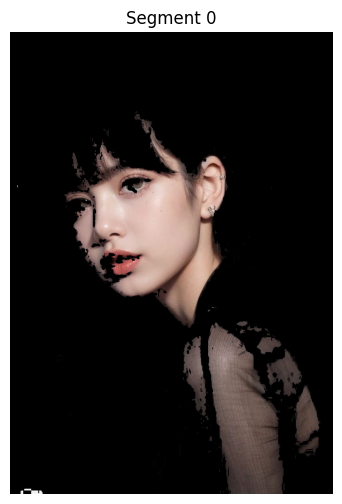

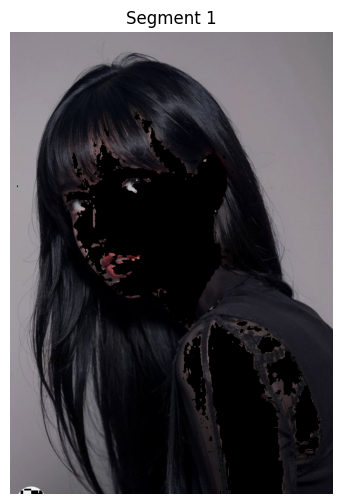

In [11]:

unique_labels = np.unique(gmm_segmentation)

# Display each segment
for label in unique_labels:
    # Create a mask for the current segment
    segment_mask = (gmm_segmentation == label).astype(np.uint8)
    
    # Apply the mask to the original image
    segment = image_rgb * segment_mask[:, :, np.newaxis]  # Mask along the color channels

    # Display the segment
    plt.figure(figsize=(6, 6))
    plt.imshow(segment)
    plt.title(f"Segment {label}")
    plt.axis("off")
    plt.show()

In [12]:
from sklearn.mixture import GaussianMixture
import cv2
import numpy as np
import matplotlib.pyplot as plt

# อ่านภาพ
image = cv2.imread('image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# แปลงเป็นข้อมูล 2D
pixels = image.reshape(-1, 3)

# จำนวนสีเด่น
n_components = 5

# ใช้ Gaussian Mixture Model
gmm = GaussianMixture(n_components=n_components, covariance_type='tied', random_state=0)
gmm.fit(pixels)

# ดึงค่าเฉลี่ย (Mean) ของแต่ละ Gaussian ซึ่งเป็นสีเด่น
dominant_colors = np.array(gmm.means_, dtype='uint8')

# แสดงผลสีเด่น
plt.figure(figsize=(8, 2))
for i, color in enumerate(dominant_colors):
    plt.subplot(1, n_components, i + 1)
    plt.imshow([[color / 255.0]])
    plt.axis('off')
plt.show()


[ WARN:0@63.266] global loadsave.cpp:275 findDecoder imread_('image.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
